# <!--BOOK_INFORMATION-->

This notebook is based on and adapted from the following sources: 
* [Python Data Science Handbook](https://github.com/jakevdp/PythonDataScienceHandbook) by Jake VanderPlas, licensed under the [CC-BY-NC-ND](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode) and [MIT](https://opensource.org/licenses/MIT) licenses;
* [Google Colab tutorials](https://colab.research.google.com/notebooks/mlcc/intro_to_pandas.ipynb).


# Visualization with Matplotlib

Notebooks are particularly useful for visualizing your projects and results. 

[Matplotlib](http://matplotlib.org/) is the most common charting package in Python, with thourough [documentation](http://matplotlib.org/api/pyplot_api.html) and many  [examples](http://matplotlib.org/gallery.html#statistics)  to draw on for inspiration.

Matplotlib is a multi-platform data visualization library built on NumPy arrays, and designed to work with the broader SciPy stack.
It was conceived by John Hunter in 2002, originally as a patch to IPython for enabling interactive MATLAB-style plotting via gnuplot from the IPython command line.
It received an early boost when it was adopted as the plotting package of choice of the Space Telescope Science Institute (the folks behind the Hubble Telescope), which financially supported Matplotlib’s development and greatly expanded its capabilities.

One of Matplotlib’s most important features is its ability to play well with many operating systems and graphics backends.
This cross-platform, everything-to-everyone approach has been a great strength and led to a large user base, which in turn has led to an active developer base and Matplotlib’s powerful tools and ubiquity within the scientific Python world.

In recent years, however, the interface and style of Matplotlib have begun to show their age. People have been developing new packages that build on its powerful internals to drive Matplotlib via cleaner, more modern APIs—for example, Seaborn, [ggpy](http://yhat.github.io/ggpy/), [HoloViews](http://holoviews.org/), [Altair](http://altair-viz.github.io/), and even Pandas itself can be used as wrappers around Matplotlib's API.
Even with wrappers like these, it is still often useful to dive into Matplotlib's syntax to adjust the final plot output.

We will discuss Matplotlib fundamentals, and the wrappers that Pandas provides.

## General Matplotlib Tips

Before we dive into the details of creating visualizations with Matplotlib, there are a few useful things you should know about using the package.

### Importing Matplotlib

Just as we use the ``np`` shorthand for NumPy and the ``pd`` shorthand for Pandas, we will use some standard shorthands for Matplotlib imports:

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

The ``plt`` interface is what we will use most often, as we shall see throughout this chapter.

### Setting Styles

We will use the ``plt.style`` directive to choose appropriate aesthetic styles for our figures.
Here we will set the traditional ``classic`` style:

In [ ]:
plt.style.use('classic')

Throughout this section, we will adjust this style as needed. If you use a native installation of Matplotlib before 1.5, only the default style sheet will be available. 
For more information on stylesheets, see [Customizing Matplotlib with style sheets and rcParams](https://matplotlib.org/3.3.1/tutorials/introductory/customizing.html).

### ``show()`` or No ``show()``? How to Display Your Plots

A visualization you can't see won't be of much use, but just how you view your Matplotlib plots depends on the context.

#### Plotting from a script

If you are using Matplotlib from within a script, the function ``plt.show()`` is your friend.
``plt.show()`` starts an event loop, looks for all currently active figure objects, and opens one or more interactive windows that display your figure or figures.

So, for example, you may have a file called *myplot.py* containing the following:

```python
# ------- file: myplot.py ------
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 100)

plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

plt.show()
```

You can then run this script from the command-line prompt, which will result in a window opening with your figure displayed:

```
$ python myplot.py
```

The ``plt.show()`` command does a lot under the hood, as it must interact with your system's interactive graphical backend.
The details of this operation can vary greatly from system to system and  installation to installation, but matplotlib tries to hide all these details from you.

One thing to be aware of: the ``plt.show()`` command should be used *only once* per Python session, and is most often seen at the very end of the script.
Multiple ``show()`` commands can lead to unpredictable backend-dependent behavior, and should mostly be avoided.

#### Plotting from an IPython shell

It can be very convenient to use Matplotlib interactively within an IPython shell (see [IPython: Beyond Normal Python](01.00-IPython-Beyond-Normal-Python.ipynb)).
IPython is built to work well with Matplotlib if you specify Matplotlib mode.
To enable this mode, you can use the ``%matplotlib`` magic command after starting ``ipython``:

```ipython
In [1]: %matplotlib
Using matplotlib backend: TkAgg

In [2]: import matplotlib.pyplot as plt
```

At this point, any ``plt`` plot command will cause a figure window to open, and further commands can be run to update the plot.
Some changes (such as modifying properties of lines that are already drawn) will not draw automatically: to force an update, use ``plt.draw()``.
Using ``plt.show()`` in Matplotlib mode is not required.

#### Plotting from an IPython notebook

Plotting interactively within an IPython notebook can be done with the ``%matplotlib`` command, and works in a similar way to the IPython shell.
In the IPython notebook, you also have the option of embedding graphics directly in the notebook, with two possible options:

- ``%matplotlib notebook`` will lead to *interactive* plots embedded within the notebook
- ``%matplotlib inline`` will lead to *static* images of your plot embedded in the notebook

Google Colab currently supports only ``%matplotlib inline``:

In [ ]:
%matplotlib inline

After running this command (Colab runs it automatically for you), any cell within the notebook that creates a plot will embed a PNG image of the resulting graphic:

In [ ]:
import numpy as np
x = np.linspace(0, 10, 100)

fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--');

### Saving Figures to File

You can save figures in a wide variety of formats using the ``savefig()`` command.
For example, to save the previous figure as a PNG file, you can run this:

In [ ]:
fig.savefig('test_figure.png')

If you are running this notebook directly from Google Drive you  are in a virtual instance on the Google Cloud. This means we have to download the figure to our machine or personal Google Drive account. 

In [ ]:
from google.colab import files
files.download("test_figure.png") 

If you were running the notebook from your machine the above is not needed and you should have a file called ``my_figure.png`` in the current working directory.

To confirm that it contains what we think it contains, let's use the IPython ``Image`` object to display the contents of this file:

In [ ]:
from IPython.display import Image
Image('test_figure.png')

In ``savefig()``, the file format is inferred from the extension of the given filename.
Depending on your backends, many different file formats are available including pdf, png, ps, jpg and raw.

Note that when saving your figure, it's not necessary to use ``plt.show()`` or related commands discussed earlier.

## Two Interfaces for the Price of One

A potentially confusing feature of Matplotlib is its dual interfaces: a convenient MATLAB-style state-based interface, and a more powerful object-oriented interface. We'll quickly highlight the differences between the two here.

#### MATLAB-style Interface

Matplotlib was originally written as a Python alternative for MATLAB users, and much of its syntax reflects that fact.
The MATLAB-style tools are contained in the pyplot (``plt``) interface.
For example, the following code will probably look quite familiar to MATLAB users:

In [ ]:
plt.figure()  # create a plot figure

# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.plot(x, np.sin(x))

# create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x));

It is important to note that this interface is *stateful*: it keeps track of the "current" figure and axes, which are where all ``plt`` commands are applied.
You can get a reference to these using the ``plt.gcf()`` (get current figure) and ``plt.gca()`` (get current axes) routines.

While this stateful interface is fast and convenient for simple plots, it is easy to run into problems.
For example, once the second panel is created, how can we go back and add something to the first?
This is possible within the MATLAB-style interface, but a bit clunky.

#### Object-oriented interface

The object-oriented interface is available for these more complicated situations, and for when you want more control over your figure.
Rather than depending on some notion of an "active" figure or axes, in the object-oriented interface the plotting functions are *methods* of explicit ``Figure`` and ``Axes`` objects.
To re-create the previous plot using this style of plotting, you might do the following:

In [ ]:
# First create a grid of plots
# ax will be an array of two Axes objects
fig, ax = plt.subplots(2)

# Call plot() method on the appropriate object
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x));

For more simple plots, the choice of which style to use is largely a matter of preference, but the object-oriented approach can become a necessity as plots become more complicated.
We will switch between the MATLAB-style and object-oriented interfaces, depending on what is most convenient.
In most cases, the difference is as small as switching ``plt.plot()`` to ``ax.plot()``, but there a few gotchas.

## Simple Line Plots

Perhaps the simplest of all plots is the visualization of a single function $y = f(x)$.

In [ ]:
plt.style.use('seaborn-whitegrid')

For all Matplotlib plots, we start by creating a figure and an axes.
In their simplest form, a figure and axes can be created as follows:

In [ ]:
fig = plt.figure()
ax = plt.axes()

In Matplotlib, the *figure* (an instance of the class ``plt.Figure``) can be thought of as a single container that contains all the objects representing axes, graphics, text, and labels.
The *axes* (an instance of the class ``plt.Axes``) is what we see above: a bounding box with ticks and labels, which will eventually contain the plot elements that make up our visualization.

Once we have created an axes, we can use the ``ax.plot`` function to plot some data. Let's start with a simple sinusoid:

In [ ]:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 1000) # sample 1000 points from 0 to 10
ax.plot(x, np.sin(x));

Alternatively, we can use the pylab interface and let the figure and axes be created for us in the background:

In [ ]:
plt.plot(x, np.sin(x));

If we want to create a single figure with multiple lines, we can simply call the ``plot`` function multiple times:

In [ ]:
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x));

That's all there is to plotting simple functions in Matplotlib!
We'll now dive into some more details about how to control the appearance of the axes and lines.

### Adjusting the Plot: Line Colors and Styles

The first adjustment you might wish to make to a plot is to control the line colors and styles.
The ``plt.plot()`` function takes additional arguments that can be used to specify these.
To adjust the color, you can use the ``color`` keyword, which accepts a string argument representing virtually any imaginable color.
The color can be specified in a variety of ways:

In [ ]:
plt.plot(x, np.sin(x - 0), color='blue')        # specify color by name
plt.plot(x, np.sin(x - 1), color='g')           # short color code (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75')        # Grayscale between 0 and 1
plt.plot(x, np.sin(x - 3), color='#FFDD44')     # Hex code (RRGGBB from 00 to FF)
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB tuple, values 0 to 1
plt.plot(x, np.sin(x - 5), color='chartreuse'); # all HTML color names supported

If no color is specified, Matplotlib will automatically cycle through a set of default colors for multiple lines.

Similarly, the line style can be adjusted using the ``linestyle`` keyword:

In [ ]:
plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted');

# For short, you can use the following codes:
plt.plot(x, x + 4, linestyle='-')  # solid
plt.plot(x, x + 5, linestyle='--') # dashed
plt.plot(x, x + 6, linestyle='-.') # dashdot
plt.plot(x, x + 7, linestyle=':');  # dotted

These ``linestyle`` and ``color`` codes can be combined into a single non-keyword argument to the ``plt.plot()`` function:

In [ ]:
plt.plot(x, x + 0, '-g')  # solid green
plt.plot(x, x + 1, '--c') # dashed cyan
plt.plot(x, x + 2, '-.k') # dashdot black
plt.plot(x, x + 3, ':r');  # dotted red

These single-character color codes reflect the standard abbreviations in the RGB (Red/Green/Blue) and CMYK (Cyan/Magenta/Yellow/blacK) color systems, commonly used for digital color graphics.

There are many other keyword arguments that can be used to fine-tune the appearance of the plot; for more details, I'd suggest viewing the docstring of the ``plt.plot()`` function using the built in help tools.

### Adjusting the Plot: Axes Limits

Matplotlib does a decent job of choosing default axes limits for your plot, but sometimes it's nice to have finer control.
The most basic way to adjust axis limits is to use the ``plt.xlim()`` and ``plt.ylim()`` methods:

In [ ]:
plt.plot(x, np.sin(x))

plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5);

A useful related method is ``plt.axis()``.
The ``plt.axis()`` method allows you to set the ``x`` and ``y`` limits with a single call, by passing a list which specifies ``[xmin, xmax, ymin, ymax]``:

In [ ]:
plt.plot(x, np.sin(x))
plt.axis([-1, 11, -1.5, 1.5]);

The ``plt.axis()`` method goes even beyond this, allowing you to do things like automatically tighten the bounds around the current plot:

In [ ]:
plt.plot(x, np.sin(x))
plt.axis('tight');

It allows even higher-level specifications, such as ensuring an equal aspect ratio so that on your screen, one unit in ``x`` is equal to one unit in ``y``, etc. 
For more information on axis limits and the other capabilities of the ``plt.axis`` method, refer to the ``plt.axis`` docstring.

### Labeling Plots

As the last piece of this section, we'll briefly look at the labeling of plots: titles, axis labels, and simple legends.

Titles and axis labels are the simplest such labels—there are methods that can be used to quickly set them:

In [ ]:
plt.plot(x, np.sin(x))
plt.title("A Sine Curve")
plt.xlabel("x")
plt.ylabel("sin(x)");

The position, size, and style of these labels can be adjusted using optional arguments to the function.
For more information, see the Matplotlib documentation and the docstrings of each of these functions.

When multiple lines are being shown within a single axes, it can be useful to create a plot legend that labels each line type.
Again, Matplotlib has a built-in way of quickly creating such a legend.
It is done via the (you guessed it) ``plt.legend()`` method.
Though there are several valid ways of using this, I find it easiest to specify the label of each line using the ``label`` keyword of the plot function:

In [ ]:
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.axis('equal')

plt.legend();

As you can see, the ``plt.legend()`` function keeps track of the line style and color, and matches these with the correct label.
More information on specifying and formatting plot legends can be found in the ``plt.legend`` docstring.

### Aside: Matplotlib Gotchas

While most ``plt`` functions translate directly to ``ax`` methods (such as ``plt.plot()`` → ``ax.plot()``, ``plt.legend()`` → ``ax.legend()``, etc.), this is not the case for all commands.
In particular, functions to set limits, labels, and titles are slightly modified.
For transitioning between MATLAB-style functions and object-oriented methods, make the following changes:

- ``plt.xlabel()``  → ``ax.set_xlabel()``
- ``plt.ylabel()`` → ``ax.set_ylabel()``
- ``plt.xlim()``  → ``ax.set_xlim()``
- ``plt.ylim()`` → ``ax.set_ylim()``
- ``plt.title()`` → ``ax.set_title()``

In the object-oriented interface to plotting, rather than calling these functions individually, it is often more convenient to use the ``ax.set()`` method to set all these properties at once:

In [ ]:
ax = plt.axes()
ax.plot(x, np.sin(x))
ax.set(xlim=(0, 10), ylim=(-2, 2),
       xlabel='x', ylabel='sin(x)',
       title='A Simple Plot');

## Other styles of plots

### Scatter Plots 
#### Scatter plots with ``plt.plot``

In the previous section we looked at ``plt.plot``/``ax.plot`` to produce line plots.
The same function can produce scatter plots as well:

In [ ]:
x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.plot(x, y, 'o', color='black');

The third argument in the function call is a character that represents the type of symbol used for the plotting. Just as you can specify options such as ``'-'``, ``'--'`` to control the line style, the marker style has its own set of short string codes. The full list of available symbols can be seen in the documentation of ``plt.plot``, or in Matplotlib's online documentation. Most of the possibilities are fairly intuitive, and we'll show a number of the more common ones here:

In [ ]:
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker,
             label="marker='{0}'".format(marker))
plt.legend(numpoints=1)
plt.xlim(0, 1.8);

#### Scatter Plots with ``plt.scatter``

A second, more powerful method of creating scatter plots is the ``plt.scatter`` function, which can be used very similarly to the ``plt.plot`` function:

In [ ]:
plt.scatter(x, y, marker='o');

The primary difference of ``plt.scatter`` from ``plt.plot`` is that it can be used to create scatter plots where the properties of each individual point (size, face color, edge color, etc.) can be individually controlled or mapped to data.

Let's show this by creating a random scatter plot with points of many colors and sizes.
In order to better see the overlapping results, we'll also use the ``alpha`` keyword to adjust the transparency level:

In [ ]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar();  # show color scale

Notice that the color argument is automatically mapped to a color scale (shown here by the ``colorbar()`` command), and that the size argument is given in pixels.
In this way, the color and size of points can be used to convey information, letting us to visualize multidimensional data.


### Bar charts

Bar charts are simple ways to visualize numerical data. For additional functionality, including horisontal bar charts, see the demos in the [Matplotlib gallery](https://matplotlib.org/3.3.1/gallery/index.html).

In [ ]:
cities = ['New York', 'Seattle', 'Boston']
x = np.arange(len(cities)) #[0,1,2]
temperature = np.random.randint(10, high=38, 
                                size=len(cities))

plt.bar(x, temperature)
plt.title('Current temperature')
plt.xlabel('City')
plt.ylabel('Temperature in Celsius')
plt.xticks(x, labels=cities);

### Box plots
Box plots give us a standardized way to visualize data based on a five number summary of the minimum, first quartile, median, third quartile, and maximum. 

In [ ]:
data1 = np.random.normal(0, 5, size=1000) #(mean, std)
data2 = np.random.normal(2, 3, size=1000)
alldata = [data1, data2]
plt.boxplot(alldata);

Passing a ``False`` value to the ``showfliers`` option will suppress outliers. For all the other options available, use the available help or view the  [documentation](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.boxplot.html?highlight=boxplot#matplotlib.pyplot.boxplot).

### Histograms, Binnings, and Density

A simple histogram can be a great first step in understanding a dataset.

In [ ]:
data = np.random.randn(1000)

In [ ]:
plt.hist(data);

The ``hist()`` function has many options to tune both the calculation and the display; 
here's an example of a more customized histogram:

In [ ]:
plt.hist(data, bins=30, density=True, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='none');

The ``plt.hist`` docstring has more information on other customization options available.
This combination of ``histtype='stepfilled'`` along with some transparency ``alpha`` can be very useful when comparing histograms of several distributions:

In [ ]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

If you would like to simply compute the histogram (that is, count the number of points in a given bin) and not display it, the ``np.histogram()`` function is available:

In [ ]:
counts, bin_edges = np.histogram(data, bins=5)
print(counts)

### Two-Dimensional Histograms and Binnings

Just as we create histograms in one dimension by dividing the number-line into bins, we can also create histograms in two-dimensions by dividing points among two-dimensional bins.
We'll take a brief look at several ways to do this here.
We'll start by defining some data—an ``x`` and ``y`` array drawn from a multivariate Gaussian distribution:

In [ ]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

#### ``plt.hist2d``: Two-dimensional histogram

One straightforward way to plot a two-dimensional histogram is to use Matplotlib's ``plt.hist2d`` function:

In [ ]:
plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

Just as with ``plt.hist``, ``plt.hist2d`` has a number of extra options to fine-tune the plot and the binning, which are nicely outlined in the function docstring.
Further, just as ``plt.hist`` has a counterpart in ``np.histogram``, ``plt.hist2d`` has a counterpart in ``np.histogram2d``, which can be used as follows:

In [ ]:
counts, xedges, yedges = np.histogram2d(x, y, bins=30)

For the generalization of this histogram binning in dimensions higher than two, see the ``np.histogramdd`` function.

## Multiple Subplots

Sometimes it is helpful to compare different views of data side by side.
To this end, Matplotlib has the concept of *subplots*: groups of smaller axes that can exist together within a single figure.
These subplots might be insets, grids of plots, or other more complicated layouts.

### ``plt.axes``: Subplots by Hand

The most basic method of creating an axes is to use the ``plt.axes`` function.
As we've seen previously, by default this creates a standard axes object that fills the entire figure.
``plt.axes`` also takes an optional argument that is a list of four numbers in the figure coordinate system.
These numbers represent ``[left, bottom, width, height]`` in the figure coordinate system, which ranges from 0 at the bottom left of the figure to 1 at the top right of the figure.

For example, we might create an inset axes at the top-right corner of another axes by setting the *x* and *y* position to 0.65 (that is, starting at 65% of the width and 65% of the height of the figure) and the *x* and *y* extents to 0.2 (that is, the size of the axes is 20% of the width and 20% of the height of the figure):

In [ ]:
ax1 = plt.axes()  # standard axes
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])

The equivalent of this command within the object-oriented interface is ``fig.add_axes()``. Let's use this to create two vertically stacked axes:

In [ ]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x));

We now have two axes (the top with no tick labels) that are just touching: the bottom of the upper panel (at position 0.5) matches the top of the lower panel (at position 0.1 + 0.4).

### ``plt.subplot``: Simple Grids of Subplots

Aligned columns or rows of subplots are a common-enough need that Matplotlib has several convenience routines that make them easy to create.
The lowest level of these is ``plt.subplot()``, which creates a single subplot within a grid.
As you can see, this command takes three integer arguments—the number of rows, the number of columns, and the index of the plot to be created in this scheme, which runs from the upper left to the bottom right:

In [ ]:
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')

The command ``plt.subplots_adjust`` can be used to adjust the spacing between these plots.
The following code uses the equivalent object-oriented command, ``fig.add_subplot()``:

In [ ]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)),
           fontsize=18, ha='center')

We've used the ``hspace`` and ``wspace`` arguments of ``plt.subplots_adjust``, which specify the spacing along the height and width of the figure, in units of the subplot size (in this case, the space is 40% of the subplot width and height).

In comparison to ``plt.subplot()``, ``plt.subplots()`` is more consistent with Python's conventional 0-based indexing.

For more information on including errorbars, customizing legends and axis ticks, annotating figures and working with stylesheets, refer to [Python Data Science Handbook](https://github.com/jakevdp/PythonDataScienceHandbook) or the official [Matplotlib tutorials](https://matplotlib.org/3.3.1/tutorials/) and documentation.

# Pandas plotting wrappers
Pandas provides easy access to basic plotting functions via the Matplotlib API with the ``.plot()`` function. Since we are still using Matplotlib in the background, a lot of the commands for adjusting plot attributes will be familiar. 

Let's start by importing the required packages and downloading one of the sample data files available on the ``seaborn`` package's GitHub page. 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.style.use('seaborn-whitegrid')

file_location = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv'
iris = pd.read_csv(file_location)

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


The ``iris`` dataset is perhaps the most famous and frequently cited dataset in the pattern recognition literature. It contains measurements in centimeters for four attributes of three different species of iris. 

The pandas ``.plot()`` function is at its most basic simply wrapper for ``plt.plot()``. When called on a dataframe it is a convenient way to plot all the columns with their labels:

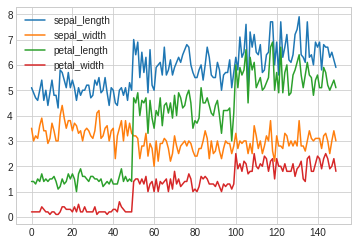

In [2]:
iris.plot();

You can also access wrappers for many of the types of plots available in Matplotlib. You can use the auto-completion ``iris.plot.<TAB>`` to show a list of available functions. 

For example, we can create a scatter plot of one column against another other using the ``x`` and ``y`` arguments. Setting plot attributes is done just like with Matplotlib. 

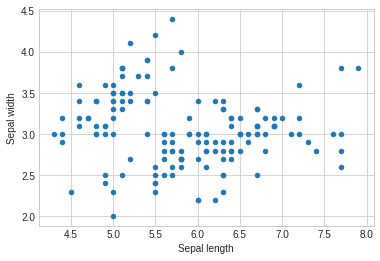

In [3]:
iris.plot.scatter(x='sepal_length', y='sepal_width')
plt.xlabel("Sepal length")
plt.ylabel("Sepal width");

Of course, we can call these methods after filtering the dataframe. For example, suppose we want to create the same scatter plot as before but only display instances with sepal length at most six:

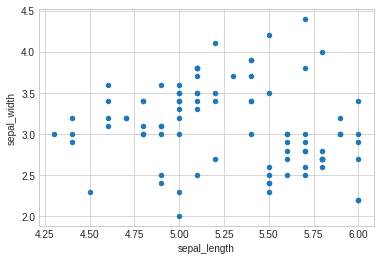

In [4]:
iris[iris.sepal_length <= 6].plot.scatter(x='sepal_length', y='sepal_width');

Histograms work as expected. For example, we can investigate the attributes of a specific species:  

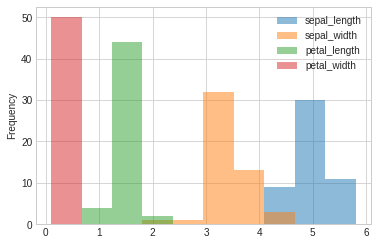

In [7]:
iris[iris.species == 'setosa'].plot.hist(alpha=0.5);

Or the distribution of a specific attribute across different species: 

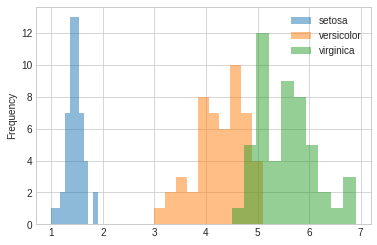

In [8]:
iris.groupby('species').petal_length.plot.hist(alpha=0.5)
plt.legend();

We can complete arbitrarily complicated aggregations before calling the plot function, for example we can compute the mean petal length per species on those samples that had petal width at most 1.8. 

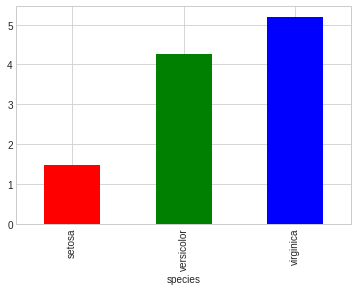

In [9]:
iris[iris.petal_width < 1.8].groupby('species')['petal_length'].mean().plot.bar(color=['r', 'g', 'b']);

Note that we cannot pass the species type into the color argument as those of you with R experience may be used to, so here I manually specify the colors to be used. Several more advanced plotting packages, including [Seaborn](https://seaborn.pydata.org/), does offer this functionality. It may be useful for you to investigate it for the group project. 

In addition to the plots available via ``Dataframe.plot.<kind>``, there are the ``DataFrame.hist()``, and ``DataFrame.boxplot()`` methods, which use a separate interface. You can read more about [Dataframe.hist](https://pandas.pydata.org/docs/user_guide/visualization.html#visualization-hist) and [Dataframe.boxplot](https://pandas.pydata.org/docs/user_guide/visualization.html#visualization-box).